In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag

np.random.seed(33)

In [2]:
%matplotlib inline

In [3]:
N = 10
D = 2
R = dag.minkowski_interval(N, D)

In [4]:
DAG = dag.CausalSetGraph()
G = DAG.generate_graph(R, weighted=True)
G_TR = nx.transitive_reduction(G)
path = DAG.traverse_path(dag.greedy_shortest_path, 'backward')
print(path)
print("Path weight: %.3f" % DAG.get_path_weight(path[::-1]))

[9, 8, 4, 0]
Path weight: 0.351


In [5]:
DAG.compute_path_property(path, dag.paths.get_angles_relative_to_geodesic, 'backward')

{(0, 4): 0.35609407204565724,
 (4, 8): -0.6834879409491071,
 (8, 9): -0.049690498473365007}

In [6]:
pos = {i:G.nodes[i]['position'][::-1] for i in G.nodes()}
labels = {i: f"{i}\n\n" + ", ".join(f"{t:.3f}" for t in G.nodes[i]['position']) for i in range(N)}

/tmp/ipykernel_100393/1196538524.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


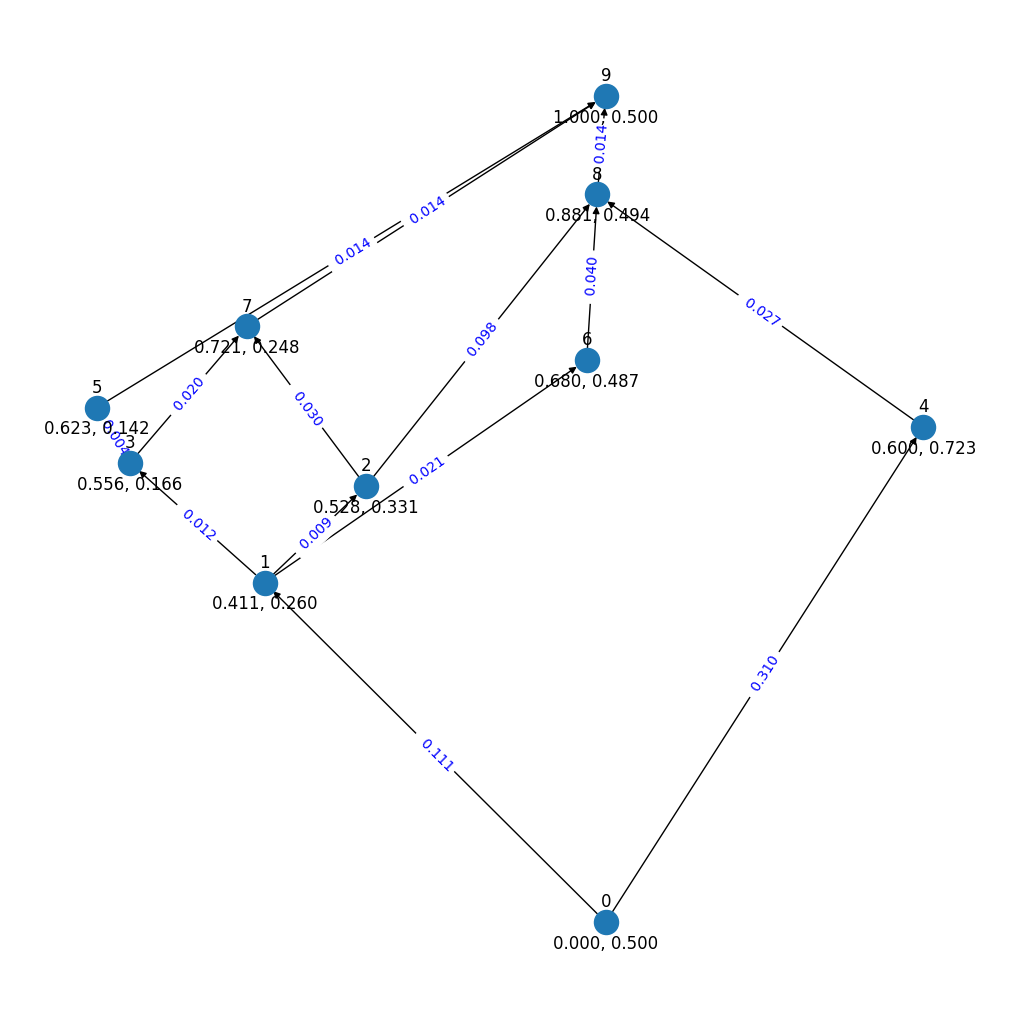

In [7]:
plt.figure(figsize=(10,10))

nx.draw(G_TR, pos=pos)
nx.draw_networkx_labels(G,pos,labels, font_color='black')
edge_labels = {i:f"{nx.get_edge_attributes(G,'weight')[i]: .3f}" for i in G_TR.edges}
nx.draw_networkx_edge_labels(G_TR, pos, edge_labels=edge_labels, font_color='blue')

plt.axis('off')
plt.tight_layout()
plt.show()